In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import statsmodels.formula.api as smf
import seaborn as sns

%matplotlib inline

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60&deg; F or warmer than 100&deg; F.

In [208]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95&deg; F, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning?

### Task 1: Finding the linear regression

In [209]:
x = df["Chirps/Second"].reshape(-1, 1)
y = df["Ground Temperature"].reshape(-1, 1)
linreg = linear_model.LinearRegression()
linreg.fit(x, y)
lr2 = linear_model.LinearRegression()
lr2.fit(y, x)
print('Intercept:', linreg.intercept_)
print('Coefficient:', linreg.coef_)

Intercept: [ 22.84898231]
Coefficient: [[ 3.410323]]


### Task 2: Charting the data and linear regression

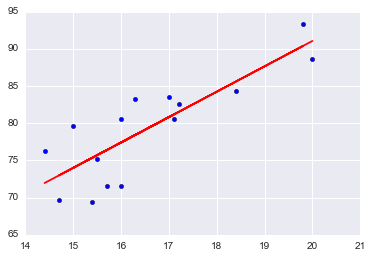

In [210]:
plt.scatter(x, y)
plt.plot(x, linreg.predict(x), color='red')
plt.show()

### Task 3: Finding the $R^2$ value

In [211]:
print('R-squared:', linreg.score(x,y))

R-squared: 0.692294652915


Not the best fit for the data, only 0.69

### Task 4 and 5: Extrapolate and interpolate data

In [212]:
print('Chirps/sec at 95 degrees:', lr2.predict(95))
print('Temperature for 18 chirps/sec', linreg.predict(18))

Chirps/sec at 95 degrees: [[ 19.74428913]]
Temperature for 18 chirps/sec [[ 84.2347963]]


## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [213]:
df = pd.read_fwf("brain_body.txt")

### Task1: Find the linear regression equation

In [214]:
x = df["Brain"].reshape(-1, 1)
y = df["Body"].reshape(-1, 1)
linreg = linear_model.LinearRegression()
linreg.fit(x, y)
print('Intercept:', linreg.intercept_)
print('Coefficient:', linreg.coef_)

Intercept: [ 91.00439621]
Coefficient: [[ 0.96649637]]


### Chart the original data and linear regression

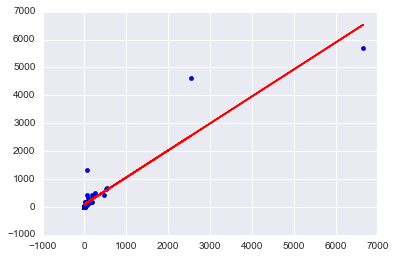

In [215]:
plt.scatter(x, y)
plt.plot(x, linreg.predict(x), color='red')
plt.show()

### Task 3: Find the $R^2$ value

In [216]:
print('R-squared:', linreg.score(x,y))

R-squared: 0.872662084304


Good fit for this data set, 0.87

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary. Support your argument with graph(s) if appropriate.

In [217]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

### Task 1: Finding the linear regression for each colomn

First we must check for outlying data points that would scew the regression results.

In [218]:
dffem = df[df.Sex == 1]
calc_fem = dffem[np.abs(dffem.Salary - dffem.Salary.mean()) <= (2 * dffem.Salary.std())]
dfmale = df[df.Sex == 0]
calc_male = dfmale[np.abs(dfmale.Salary - dfmale.Salary.mean()) <= (2 * dfmale.Salary.std())]
frames = [calc_fem, calc_male]
new_df = pd.concat(frames)

Now we can find the linear regressions

In [219]:
y = df["Salary"].reshape(-1, 1)

a = new_df["Sex"].reshape(-1, 1)
y_new = new_df["Salary"].reshape(-1, 1)
lra = linear_model.LinearRegression()
lra.fit(a, y_new)
print('Sex equation')
print('Intercept:', lra.intercept_)
print('Coefficient:', lra.coef_)

b = df["Rank"].reshape(-1, 1)
lrb = linear_model.LinearRegression()
lrb.fit(b, y)
print('\nRank equation')
print('Intercept:', lrb.intercept_)
print('Coefficient:', lrb.coef_)

c = df["Year"].reshape(-1, 1)
lrc = linear_model.LinearRegression()
lrc.fit(c, y)
print('\nYear equation')
print('Intercept:', lrc.intercept_)
print('Coefficient:', lrc.coef_)

d = df["Degree"].reshape(-1, 1)
lrd = linear_model.LinearRegression()
lrd.fit(d, y)
print('\nDegree equation')
print('Intercept:', lrd.intercept_)
print('Coefficient:', lrd.coef_)

e = df["YSdeg"].reshape(-1, 1)
lre = linear_model.LinearRegression()
lre.fit(e, y)
print('\nYSdeg equation')
print('Intercept:', lre.intercept_)
print('Coefficient:', lre.coef_)


Sex equation
Intercept: [ 24381.83783784]
Coefficient: [[-4308.37629938]]

Rank equation
Intercept: [ 11663.14300203]
Coefficient: [[ 5952.77890467]]

Year equation
Intercept: [ 18166.14754547]
Coefficient: [[ 752.79775742]]

Degree equation
Intercept: [ 24359.22222222]
Coefficient: [[-858.86928105]]

YSdeg equation
Intercept: [ 17502.25738659]
Coefficient: [[ 390.64512637]]


### Task 2: Finding the best $R^2$

In [220]:
print('Sex R-squared:', lra.score(a, y_new))
print('\nRank R-squared:', lrb.score(b, y))
print('\nYear R-squared:', lrc.score(c, y))
print('\nDegree R-squared:', lrd.score(d, y))
print('\nYSdeg R-squared:', lre.score(e, y))

Sex R-squared: 0.126570240945

Rank R-squared: 0.752536053927

Year R-squared: 0.490937026769

Degree R-squared: 0.00486168098475

YSdeg R-squared: 0.455428134584


The rank data seems to have the best $R^2$

### Task 3: Conclusions
I think sex does have an effect on salary here, the scatter plot obviously shows the distinct distance between men and womens salaries.

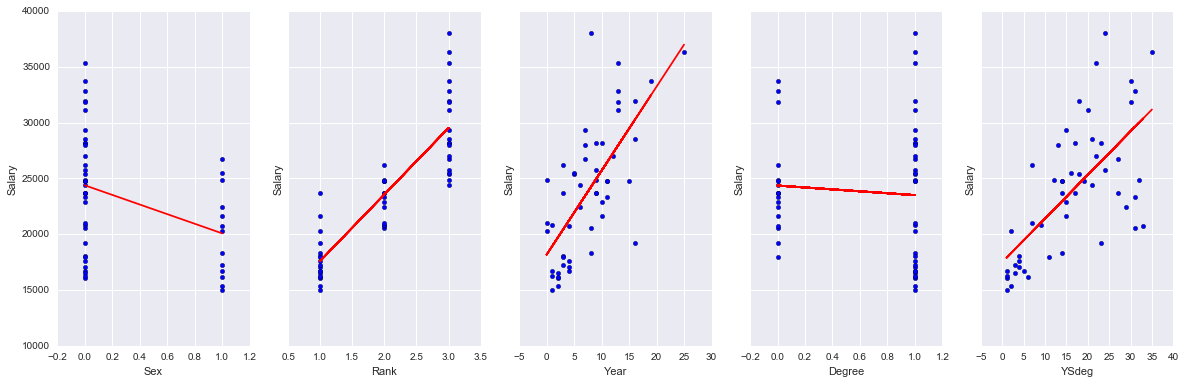

In [221]:
fig, axs = plt.subplots(1, 5, sharey=True, figsize=(20, 6))
axs[0].scatter(new_df.Sex, y_new)
axs[0].plot(a, lra.predict(a), color='red')
axs[0].set_xlabel('Sex')
axs[0].set_ylabel('Salary')

axs[1].scatter(df.Rank, y)
axs[1].plot(b, lrb.predict(b), color='red')
axs[1].set_xlabel('Rank')
axs[1].set_ylabel('Salary')

axs[2].scatter(df.Year, y)
axs[2].plot(c, lrc.predict(c), color='red')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Salary')

axs[3].scatter(df.Degree, y)
axs[3].plot(d, lrd.predict(d), color='red')
axs[3].set_xlabel('Degree')
axs[3].set_ylabel('Salary')

axs[4].scatter(df.YSdeg, y)
axs[4].plot(e, lre.predict(e), color='red')
axs[4].set_xlabel('YSdeg')
axs[4].set_ylabel('Salary')

# df.plot(kind='scatter', x='Sex', y='Salary', ax=axs[0], figsize=(20,5))
# df.plot(kind='scatter', x='Rank', y='Salary', ax=axs[1])
# df.plot(kind='scatter', x='Year', y='Salary', ax=axs[2])
# df.plot(kind='scatter', x='Degree', y='Salary', ax=axs[3])
# df.plot(kind='scatter', x='YSdeg', y='Salary', ax=axs[4])